In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
plt.rc('font',family='NanumGothic ECO')
plt.rc('axes',unicode_minus=False)
import scipy.stats as stats
import seaborn as sns

In [2]:
Car_raw= pd.read_csv("/home/piai/다운로드/Preprocessed_Car.csv", encoding='euc-kr')
Car_raw.tail(10)

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
6723,437,VOLVO V40 D3,Bangalore,33725.12,2015,33000,Diesel,Automatic,Second,16.8,1984,150.0,5.0,VOLVO,V40 D3,2
6724,4788,VOLVO V40 D3 R DESIGN,Hyderabad,36791.04,2015,38000,Diesel,Automatic,Second,16.8,1969,150.0,5.0,VOLVO,V40 D3 R DESIGN,2
6725,5583,VOLVO XC60 D4 SUMMUM,Kochi,26290.26,2014,93144,Diesel,Automatic,First,14.7,1984,181.0,5.0,VOLVO,XC60 D4 SUMMUM,5
6726,4429,VOLVO XC60 D4 SUMMUM,Hyderabad,27976.52,2012,86000,Diesel,Automatic,Second,14.7,1985,163.0,5.0,VOLVO,XC60 D4 SUMMUM,5
6727,4044,VOLVO XC60 D5,Ahmedabad,18395.52,2011,173000,Diesel,Automatic,First,13.5,2400,215.0,5.0,VOLVO,XC60 D5,6
6728,3933,VOLVO XC60 D5,Hyderabad,49821.20,2015,100000,Diesel,Automatic,First,13.5,2400,215.0,5.0,VOLVO,XC60 D5,5
6729,989,VOLVO XC60 D5,Pune,21154.85,2011,106976,Diesel,Automatic,First,13.5,2400,215.0,5.0,VOLVO,XC60 D5,6
6730,1178,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.2,2400,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
6731,4497,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.1,2400,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6
6732,2401,VOLVO XC90 2007-2015 D5 AWD,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.1,2400,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,5


In [3]:
Car_raw.describe()

,Unnamed: 0,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade
count,6733.000000,6733.000000,6733.000000,6.733000e+03,6733.000000,6733.000000,6733.000000,6733.000000,6733.000000
mean,3472.486262,14739.254243,2013.520422,5.792373e+04,18.425451,1613.027180,112.365288,5.279964,3.206891
std,2026.871686,17226.652552,3.129471,8.696210e+04,4.150502,592.489078,53.374119,0.798400,1.397668
min,0.000000,7.080000,1998.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,1.000000
25%,1727.000000,5442.010000,2012.000000,3.315000e+04,15.410000,1198.000000,75.000000,5.000000,2.000000
50%,3448.000000,8814.520000,2014.000000,5.232500e+04,18.500000,1493.000000,93.000000,5.000000,3.000000
75%,5174.000000,15559.540000,2016.000000,7.200000e+04,21.100000,1968.000000,138.030000,5.000000,4.000000
max,7252.000000,245273.600000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,6.000000


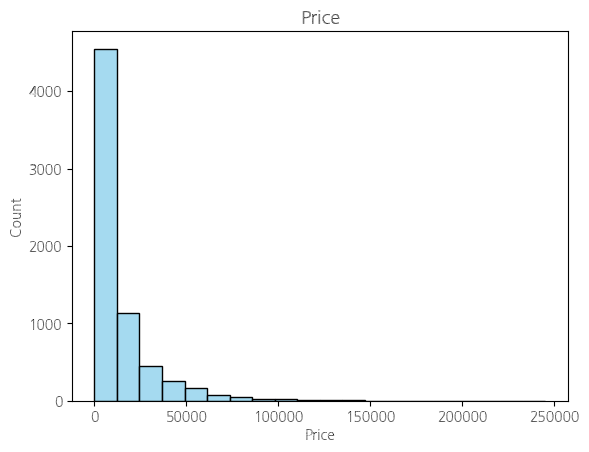

In [4]:
sns.histplot(data=Car_raw, x='Price', bins=20,  color="skyblue")
plt.title('Price', fontsize=13)
plt.show()

In [5]:
y_log_transformed = np.log1p(Car_raw['Price'].to_numpy().reshape(-1, 1))

scaler = StandardScaler()
y_norm = scaler.fit_transform(y_log_transformed)
y_norm

array([[-1.79939941],
       [ 1.10620803],
       [ 1.28516084],
       ...,
       [ 1.15309119],
       [ 1.52069391],
       [ 1.52413486]])

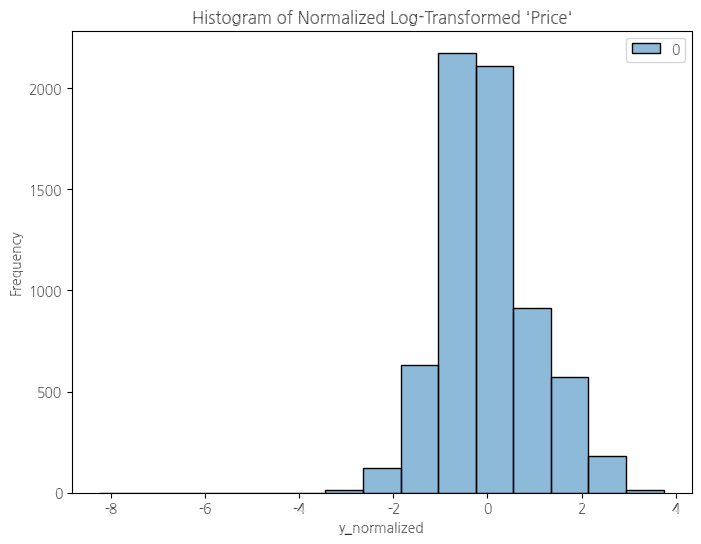

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(y_norm, bins=15, color="skyblue")
plt.title("Histogram of Normalized Log-Transformed 'Price'")
plt.xlabel("y_normalized")
plt.ylabel("Frequency")
plt.show()

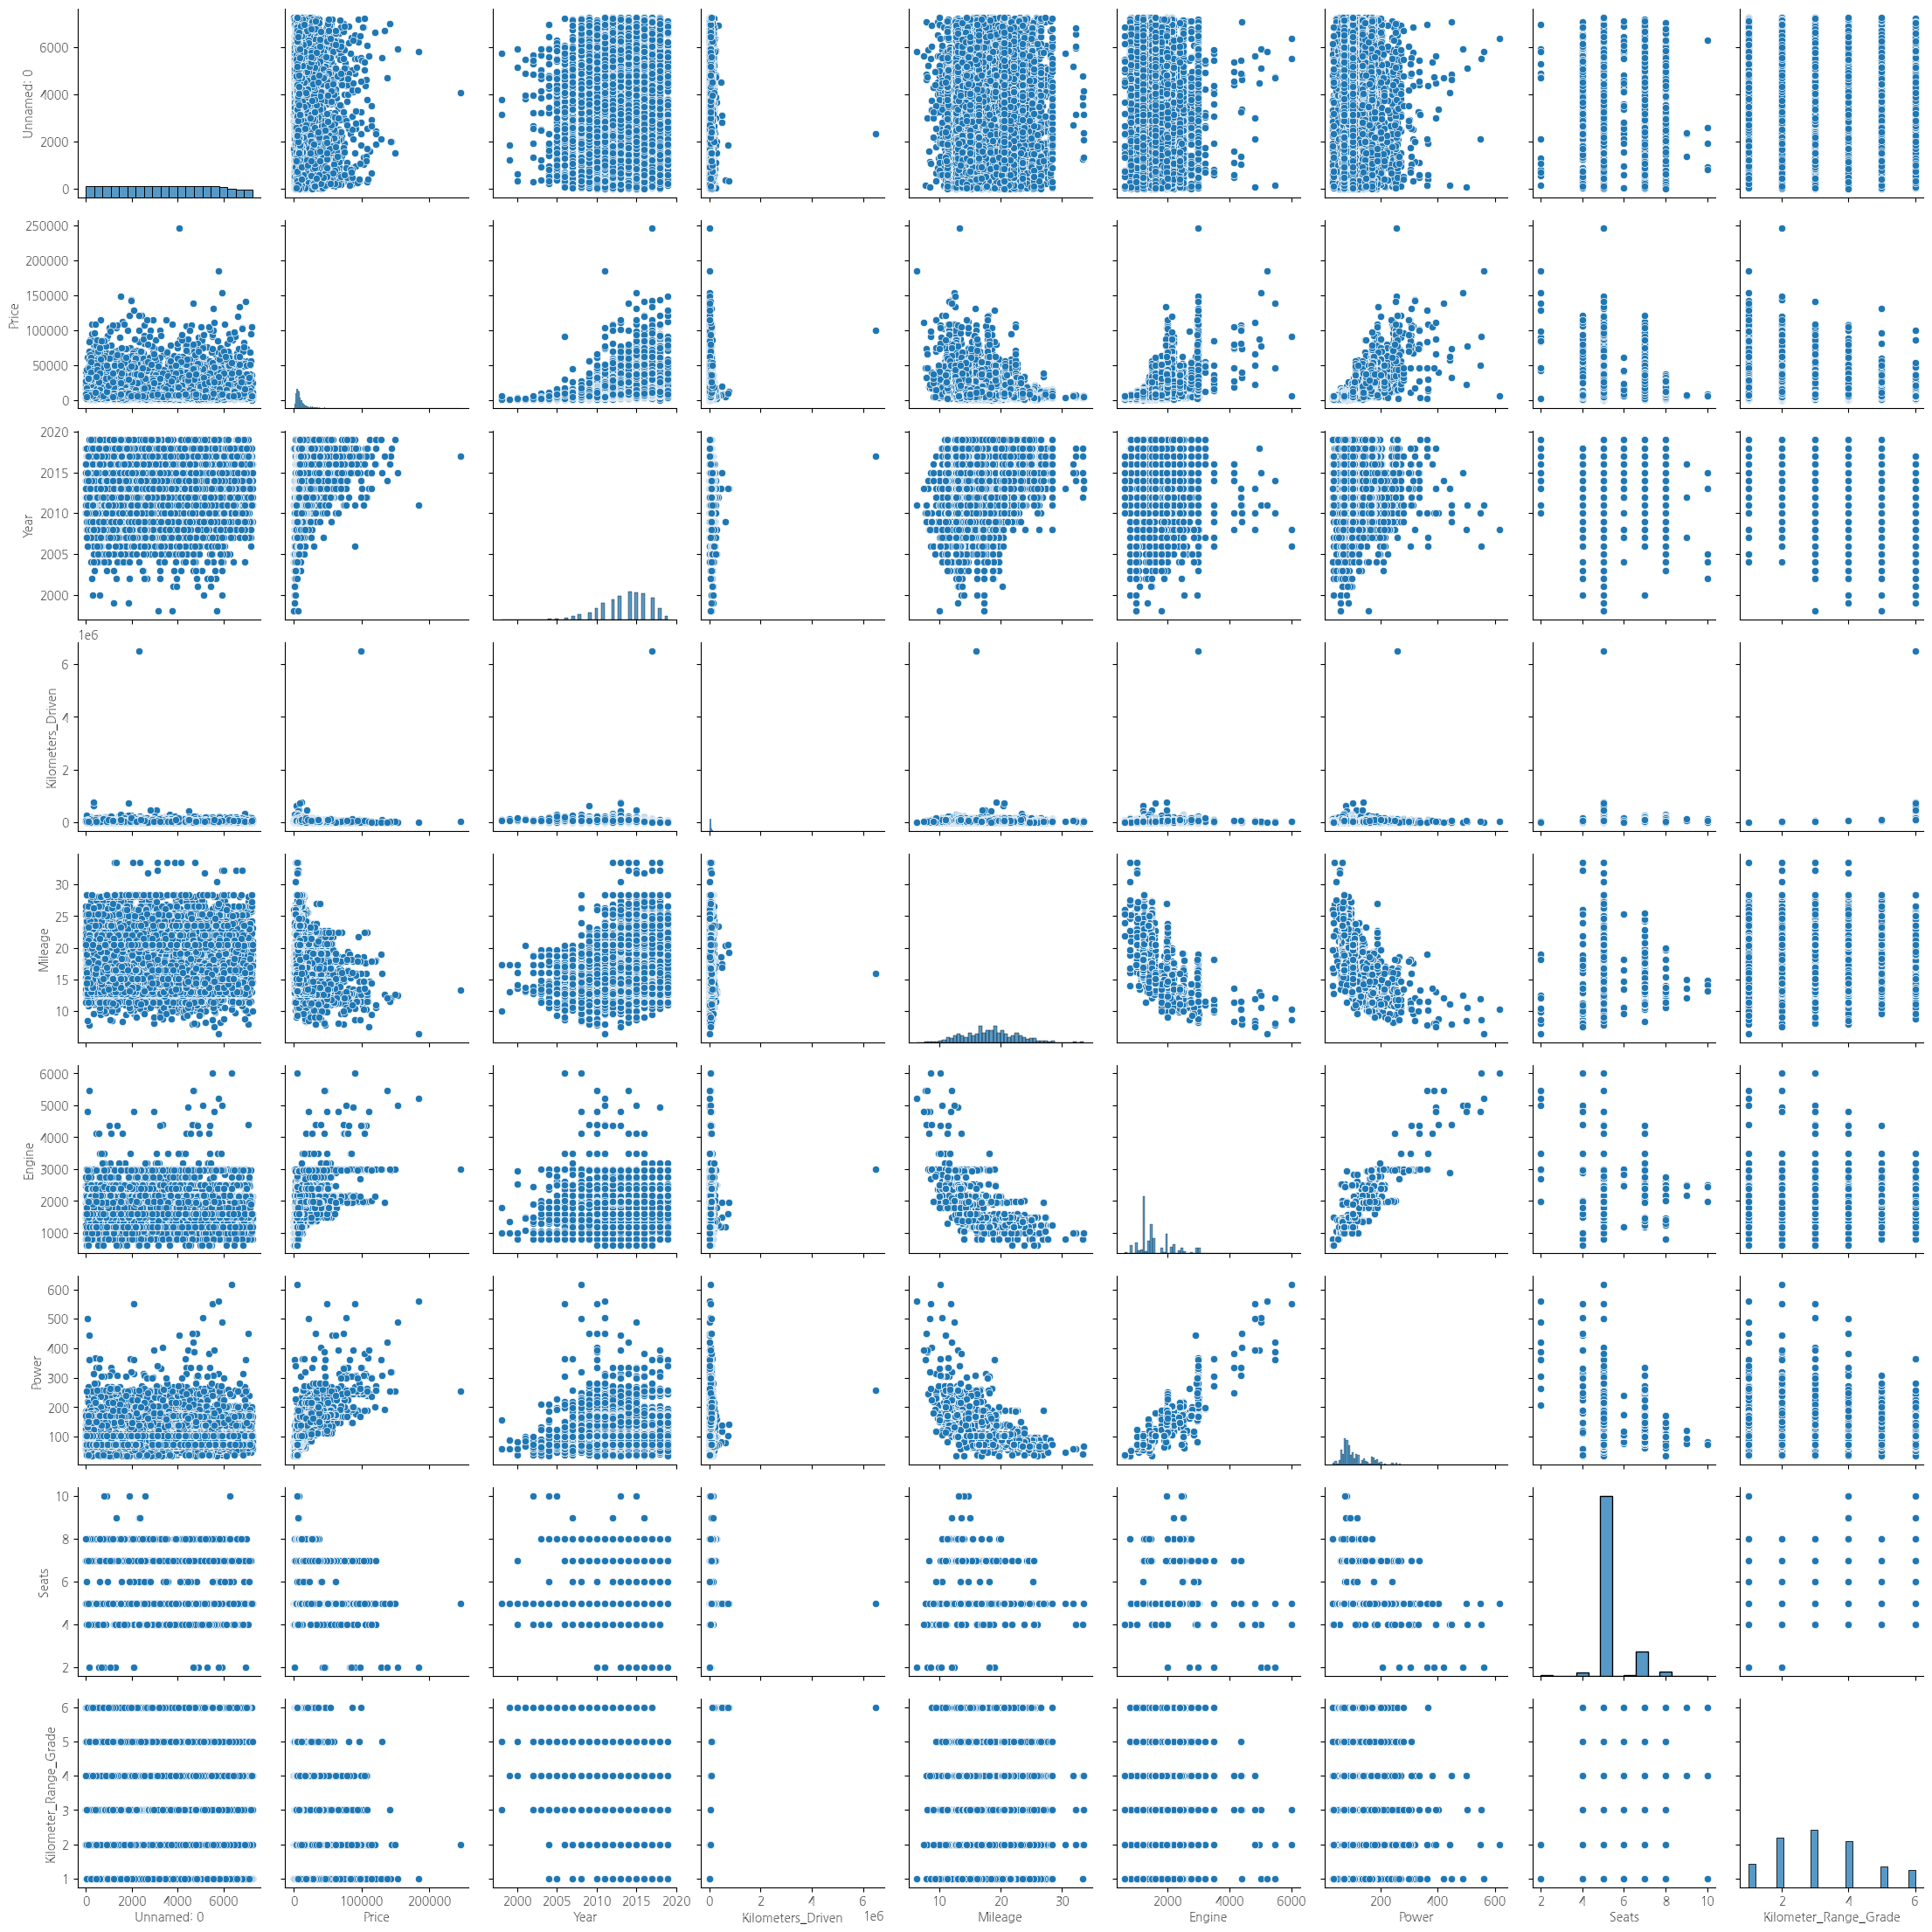

In [7]:
sns.pairplot(Car_raw)

'Power'와 'Engine'사이에 다중 공선성 확인

/tmp/ipykernel_2147/3308671881.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p1=sns.barplot(x='Location', y='Price', data=Car_raw, ci=None)


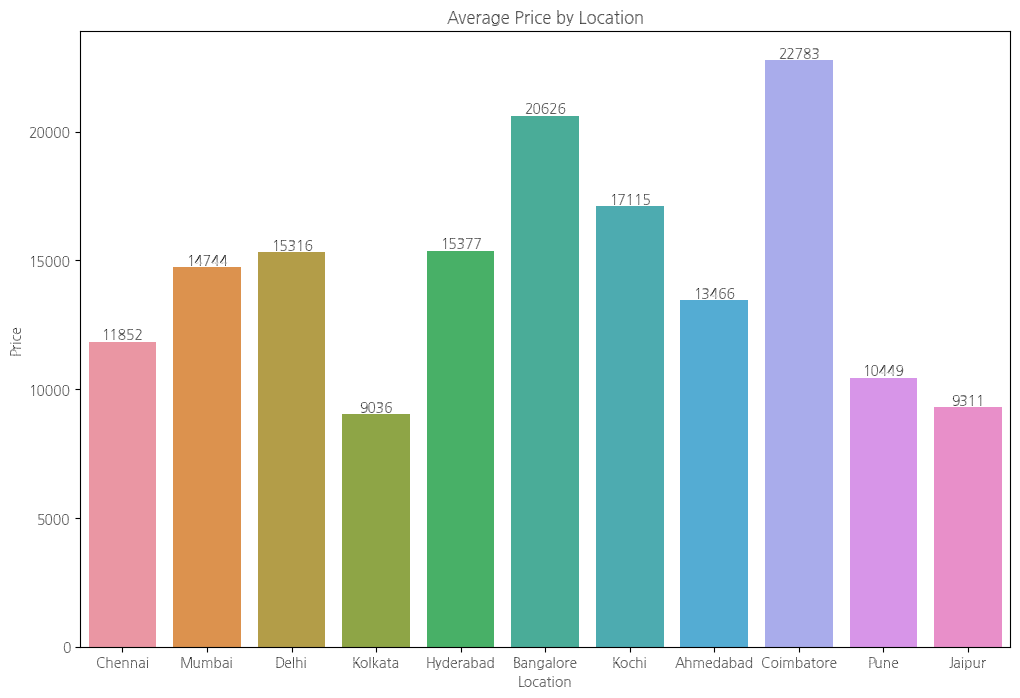

In [8]:
plt.figure(figsize=(12, 8)) 
p1=sns.barplot(x='Location', y='Price', data=Car_raw, ci=None)

for container in p1.containers:
    p1.bar_label(container, fmt='%d')

plt.title('Average Price by Location')
plt.show()

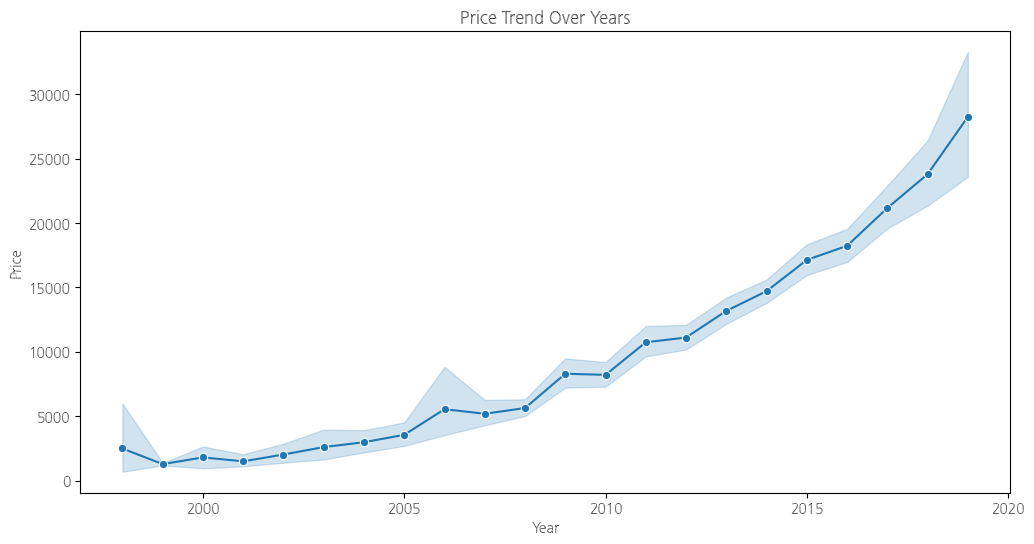

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price', data=Car_raw, marker='o')

plt.title('Price Trend Over Years')
plt.show()

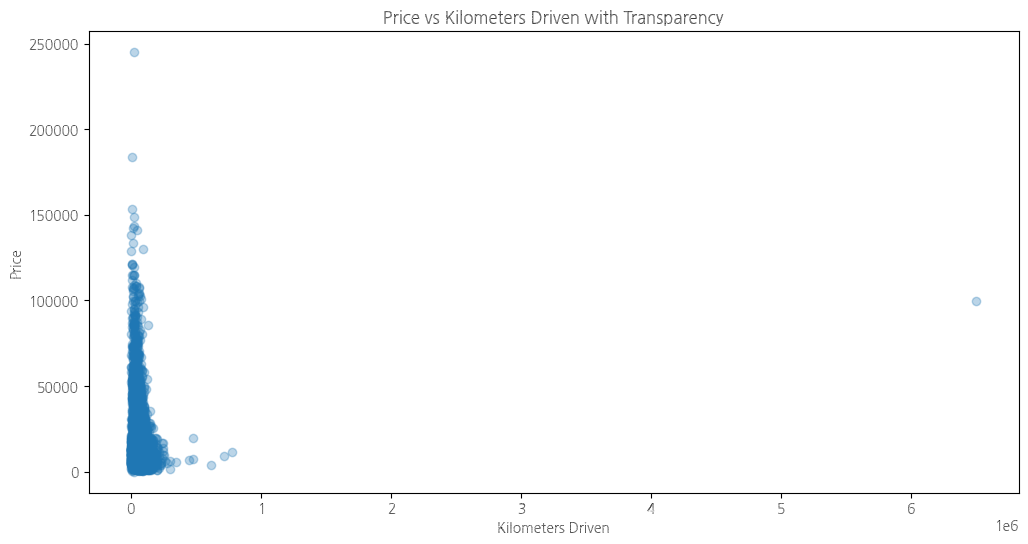

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(Car_raw['Kilometers_Driven'], Car_raw['Price'], alpha=0.3)  # alpha로 투명도 조절
plt.title('Price vs Kilometers Driven with Transparency')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

/tmp/ipykernel_2147/438227264.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p2=sns.barplot(x='Fuel_Type', y='Price', data=Car_raw, ci=None)


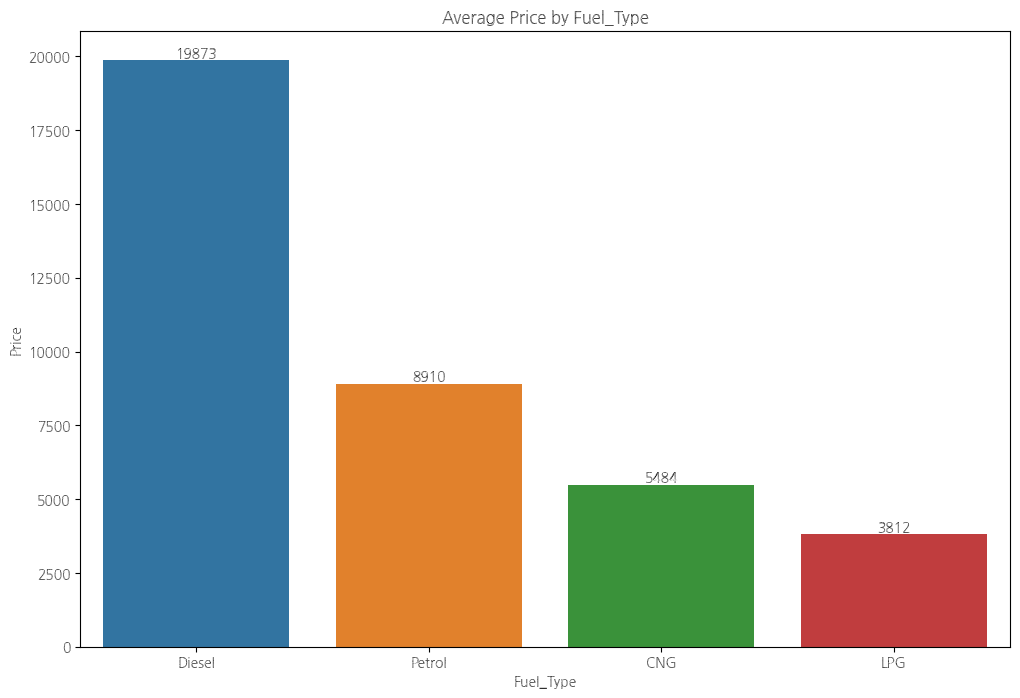

In [11]:
plt.figure(figsize=(12, 8)) 
p2=sns.barplot(x='Fuel_Type', y='Price', data=Car_raw, ci=None)

for container in p2.containers:
    p2.bar_label(container, fmt='%d')
    
plt.title('Average Price by Fuel_Type')    
plt.show()

/tmp/ipykernel_2147/1171446708.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p3=sns.barplot(x='Transmission', y='Price', data=Car_raw, ci=None)


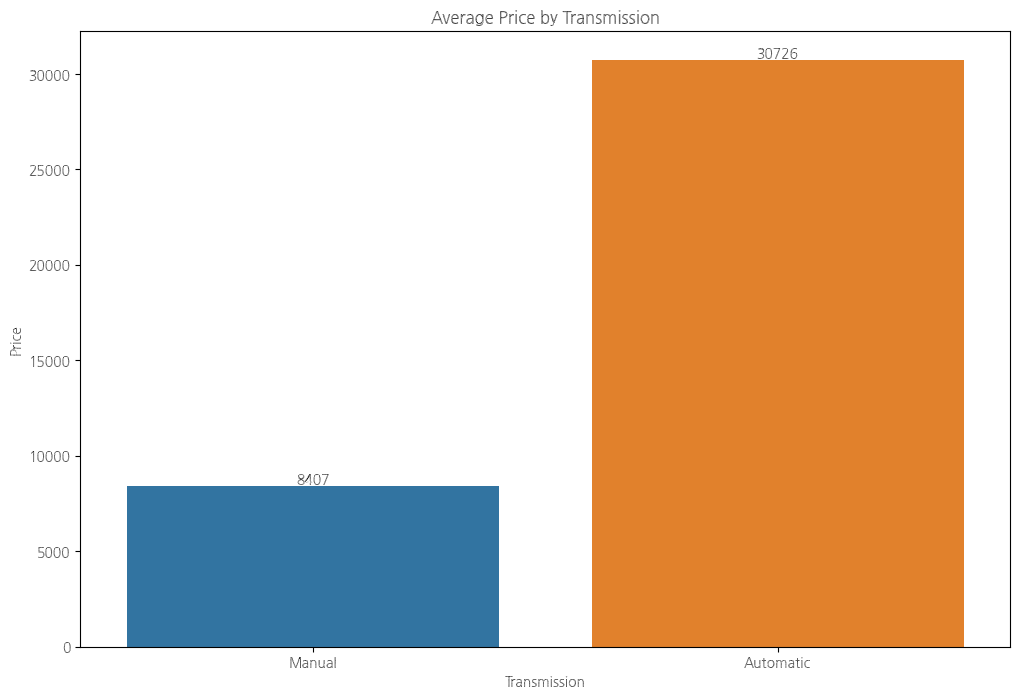

In [12]:
plt.figure(figsize=(12, 8)) 
p3=sns.barplot(x='Transmission', y='Price', data=Car_raw, ci=None)

for container in p3.containers:
    p3.bar_label(container, fmt='%d')

plt.title('Average Price by Transmission') 
plt.show()

/tmp/ipykernel_2147/2925061564.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p4=sns.barplot(x='Owner_Type', y='Price', data=Car_raw, ci=None)


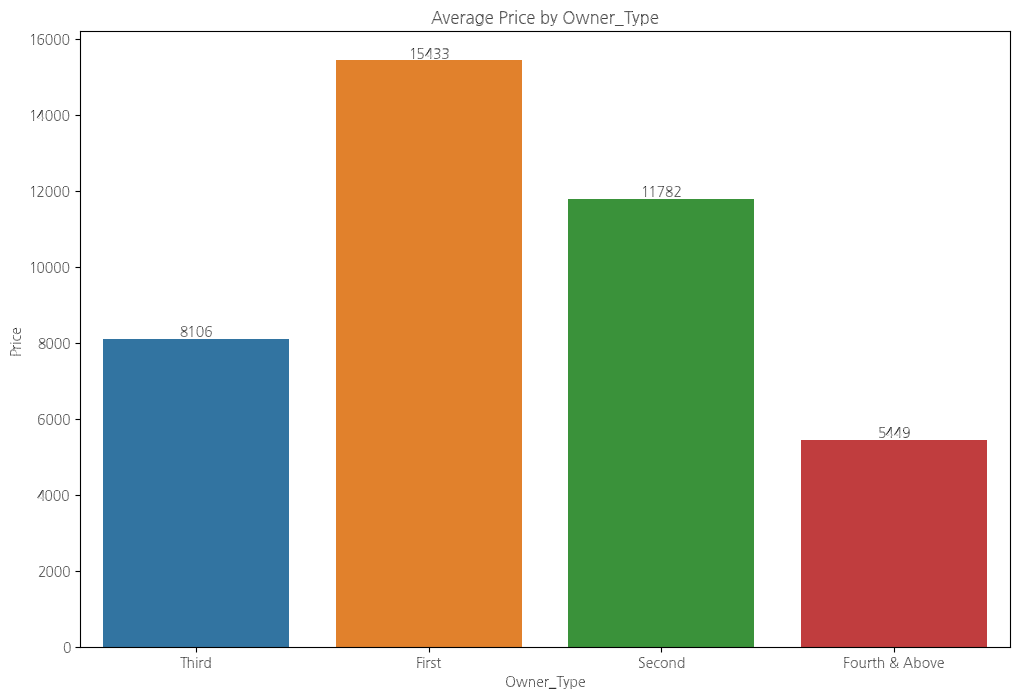

In [13]:
plt.figure(figsize=(12, 8)) 
p4=sns.barplot(x='Owner_Type', y='Price', data=Car_raw, ci=None)

for container in p4.containers:
    p4.bar_label(container, fmt='%d')

plt.title('Average Price by Owner_Type') 
plt.show()

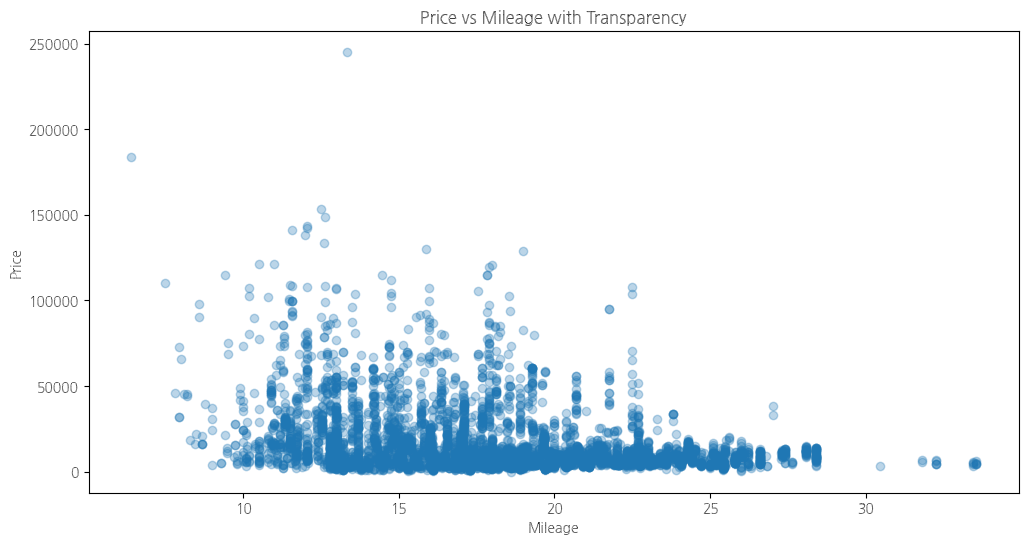

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(Car_raw['Mileage'], Car_raw['Price'], alpha=0.3) 
plt.title('Price vs Mileage with Transparency')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

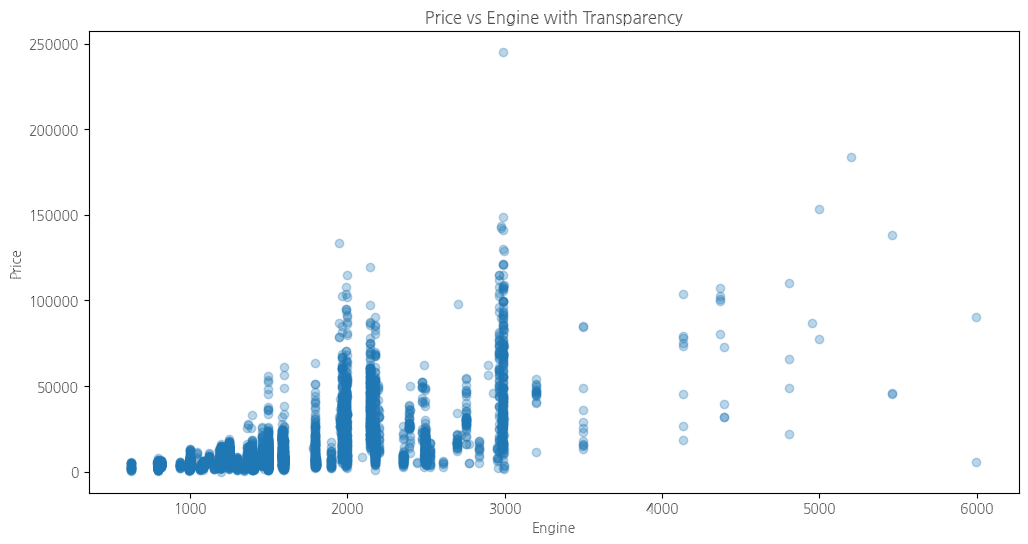

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(Car_raw['Engine'], Car_raw['Price'], alpha=0.3) 
plt.title('Price vs Engine with Transparency')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()

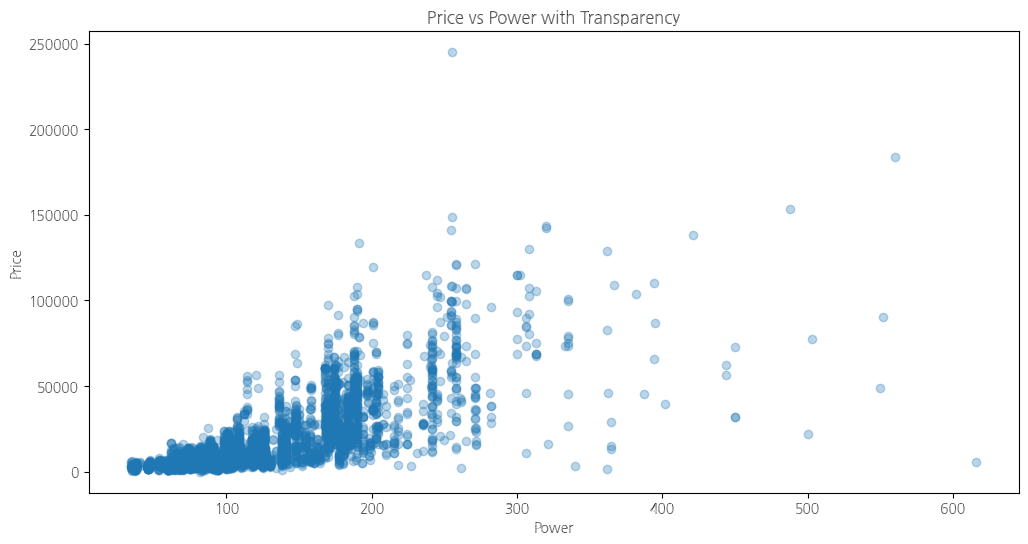

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(Car_raw['Power'], Car_raw['Price'], alpha=0.3) 
plt.title('Price vs Power with Transparency')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

/tmp/ipykernel_2147/747577509.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p7=sns.barplot(x='Seats', y='Price', data=Car_raw, ci=None)


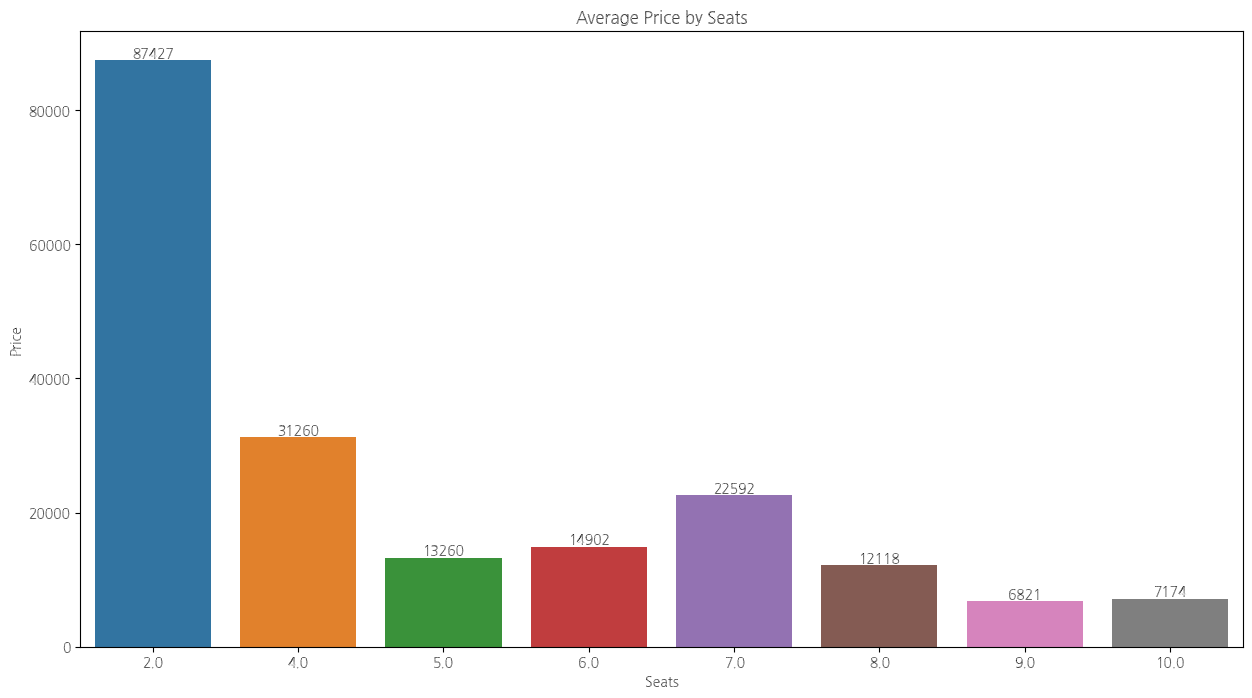

In [17]:
plt.figure(figsize=(15, 8)) 
p7=sns.barplot(x='Seats', y='Price', data=Car_raw, ci=None)

for container in p7.containers:
    p7.bar_label(container, fmt='%d')

plt.title('Average Price by Seats')
plt.show()

/tmp/ipykernel_2147/1569192308.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p5=sns.barplot(x='BRAND', y='Price', data=Car_raw, ci=None)


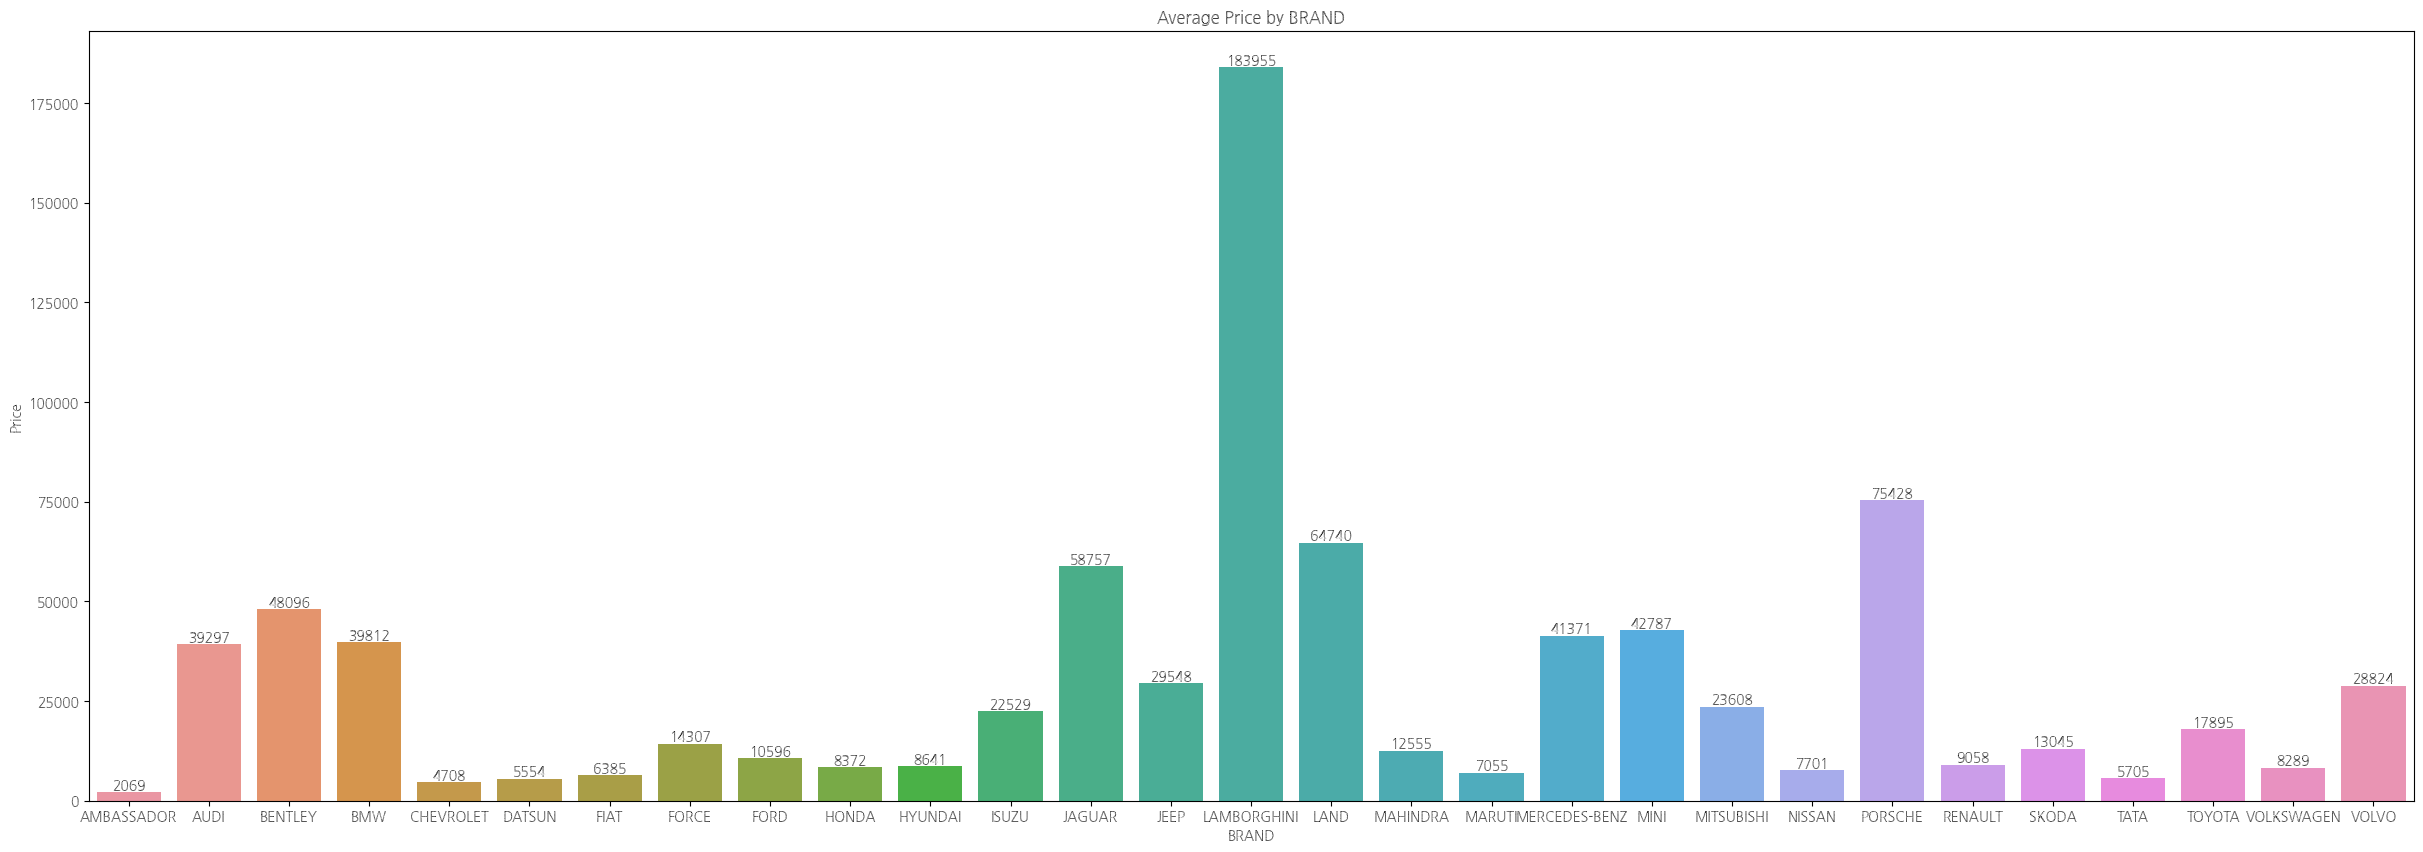

In [18]:
plt.figure(figsize=(30, 10)) 
p5=sns.barplot(x='BRAND', y='Price', data=Car_raw, ci=None)

for container in p5.containers:
    p5.bar_label(container, fmt='%d')

plt.title('Average Price by BRAND') 
plt.show()

/tmp/ipykernel_2147/2488022006.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p6=sns.barplot(x='Kilometer_Range_Grade', y='Price', data=Car_raw, ci=None)


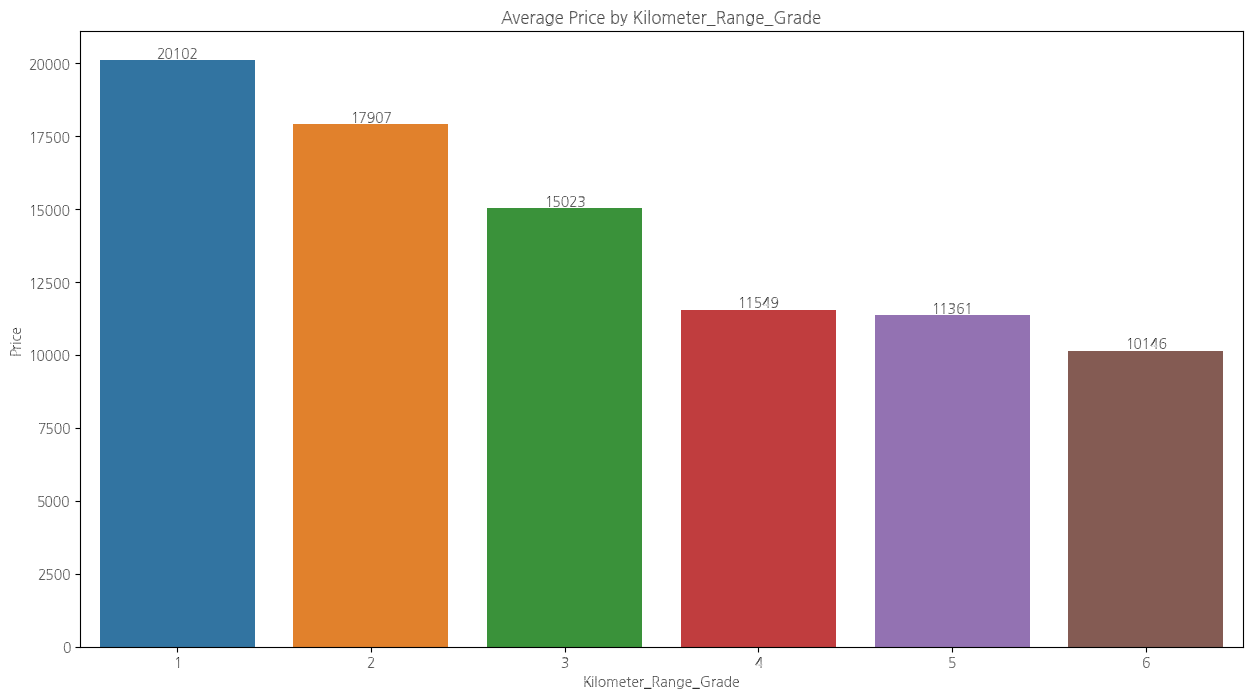

In [19]:
plt.figure(figsize=(15, 8)) 
p6=sns.barplot(x='Kilometer_Range_Grade', y='Price', data=Car_raw, ci=None)

for container in p6.containers:
    p6.bar_label(container, fmt='%d')

plt.title('Average Price by Kilometer_Range_Grade')
plt.show()

/tmp/ipykernel_2147/238928709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Car_raw.corr()


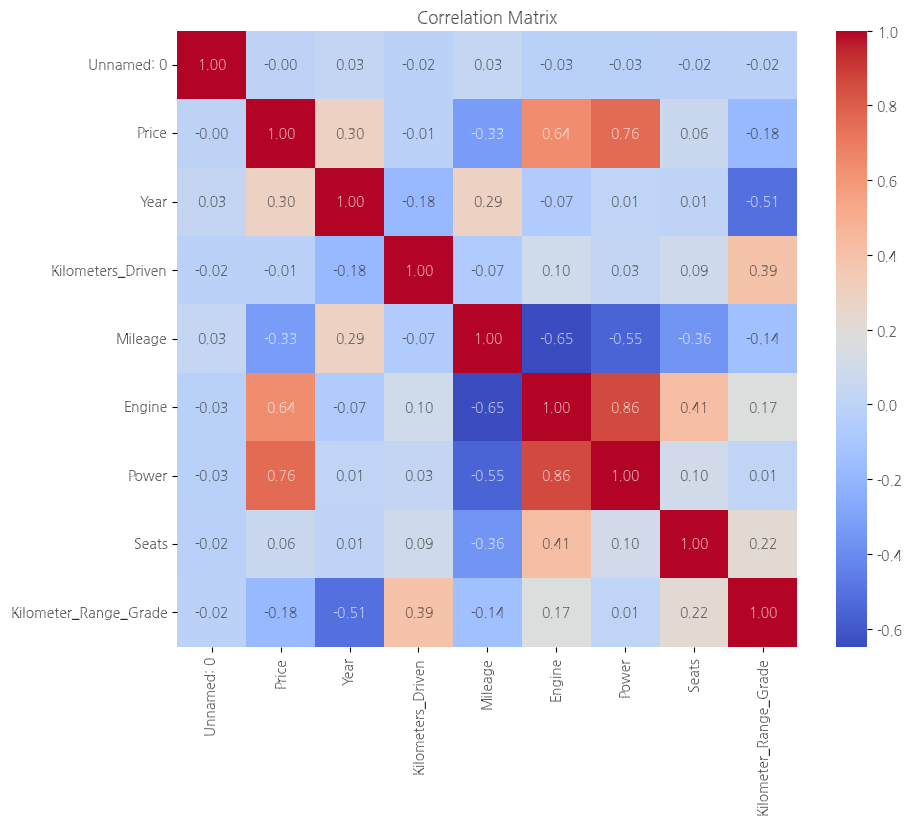

In [20]:
correlation_matrix = Car_raw.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
